## Tabela Ciença Computação

In [1]:
import pandas as pd

# Caminho para a tabela
caminho_tabela = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/cienca_computacao.csv'

# Carregar a tabela
cienca_computacao_df = pd.read_csv(caminho_tabela)

# Verificar as primeiras linhas e resumo estatístico
print(cienca_computacao_df.head())
print(cienca_computacao_df.info())
print(cienca_computacao_df.describe())

   MATRICULA  PERIODO_RELATIVO                      CURSO  PERIODO  \
0  102110001                 1  CIÊNCIA DA COMPUTAÇÃO - D   2002.1   
1  102110001                 2  CIÊNCIA DA COMPUTAÇÃO - D   2002.2   
2  102110001                 3  CIÊNCIA DA COMPUTAÇÃO - D   2003.1   
3  102110001                 4  CIÊNCIA DA COMPUTAÇÃO - D   2003.2   
4  102110001                 5  CIÊNCIA DA COMPUTAÇÃO - D   2004.1   

   COD_EVASAO  DISC.FERIAS  N.DISC.OBRIGATORIA  N.DISC.OPTATIVA  N.DISC  \
0           0            0                   6                0       6   
1           0            0                   6                0       6   
2           0            0                   6                0       6   
3           0            0                   7                1       8   
4           0            0                   4                2       6   

   N.CREDITOS.OBRIGATORIA  ...  PROP.N.RPN  PROP.N.TRAN  PROP.N.REPR  \
0                      24  ...         0.0          0.0 

### Número de registro único de alunos

In [3]:

total_alunos = cienca_computacao_df['MATRICULA'].nunique()
print(f"Total de alunos únicos: {total_alunos}")


Total de alunos únicos: 1296


In [4]:
distribuicao_periodo = cienca_computacao_df['PERIODO_RELATIVO'].value_counts()
print(distribuicao_periodo)


PERIODO_RELATIVO
1     1289
2     1113
3      963
4      802
5      633
6      523
7      441
8      384
9      327
10     176
11      88
12      49
13      24
14      13
15       9
16       3
19       1
25       1
26       1
27       1
Name: count, dtype: int64


### Porcentagem do curso completo pelos alunos :

In [5]:
porcentagem_completa = cienca_computacao_df['PORCENTAGE.CURSO.COMPLETO'].describe()
print("Resumo das porcentagens de conclusão do curso:")
print(porcentagem_completa)


Resumo das porcentagens de conclusão do curso:
count    6841.000000
mean       11.942731
std        79.584489
min         0.000000
25%         0.115385
50%         0.288462
75%         0.557692
max       875.000000
Name: PORCENTAGE.CURSO.COMPLETO, dtype: float64


### Analisar valores deCOD_EVASAO :

In [6]:
cod_evasao_freq = cienca_computacao_df['COD_EVASAO'].value_counts()
print("Frequência de códigos de evasão:")
print(cod_evasao_freq)


Frequência de códigos de evasão:
COD_EVASAO
0    6230
1     611
Name: count, dtype: int64


In [7]:
alunos_evadidos = cienca_computacao_df[cienca_computacao_df['COD_EVASAO'] > 0]
print("Alunos evadidos:")
print(alunos_evadidos.head())


Alunos evadidos:
     MATRICULA  PERIODO_RELATIVO                      CURSO  PERIODO  \
35   102110008                 8  CIÊNCIA DA COMPUTAÇÃO - D   2005.2   
49   102110010                 5  CIÊNCIA DA COMPUTAÇÃO - D   2004.1   
73   102110016                 4  CIÊNCIA DA COMPUTAÇÃO - D   2003.2   
180  102110033                 6  CIÊNCIA DA COMPUTAÇÃO - D   2004.2   
187  102110034                 7  CIÊNCIA DA COMPUTAÇÃO - D   2005.1   

     COD_EVASAO  DISC.FERIAS  N.DISC.OBRIGATORIA  N.DISC.OPTATIVA  N.DISC  \
35            1            0                   5                1       6   
49            1            0                   1                2       3   
73            1            0                   7                0       7   
180           1            0                   5                0       5   
187           1            0                   4                1       5   

     N.CREDITOS.OBRIGATORIA  ...  PROP.N.RPN  PROP.N.TRAN  PROP.N.REPR  \
35           

In [8]:
media_evadidos = alunos_evadidos[['N.CREDITOS', 'N.DISC']].mean()
print("Médias de créditos e disciplinas cursadas por alunos evadidos:")
print(media_evadidos)


Médias de créditos e disciplinas cursadas por alunos evadidos:
N.CREDITOS    19.685761
N.DISC         5.211129
dtype: float64


In [9]:
media_aprovacao = cienca_computacao_df['MEDIA.APROV'].describe()
print("Estatísticas de médias de aprovação:")
print(media_aprovacao)


Estatísticas de médias de aprovação:
count    6841.000000
mean      569.806937
std      1955.166257
min         0.000000
25%         6.700000
50%         7.500000
75%         8.216667
max      9625.000000
Name: MEDIA.APROV, dtype: float64


In [10]:
repro_falta_nota = cienca_computacao_df[['N.RPF', 'N.REPR']].sum()
print("Total de reprovações por falta e nota:")
print(repro_falta_nota)


Total de reprovações por falta e nota:
N.RPF     3118
N.REPR    8486
dtype: int64


In [11]:
cienca_computacao_df['PROP.REPR'] = cienca_computacao_df['N.REPR'] / cienca_computacao_df['N.DISC']
proporcao_repro = cienca_computacao_df['PROP.REPR'].describe()
print("Proporção de reprovações em relação às disciplinas cursadas:")
print(proporcao_repro)


Proporção de reprovações em relação às disciplinas cursadas:
count    6841.000000
mean        0.228808
std         0.309968
min         0.000000
25%         0.000000
50%         0.000000
75%         0.400000
max         1.000000
Name: PROP.REPR, dtype: float64


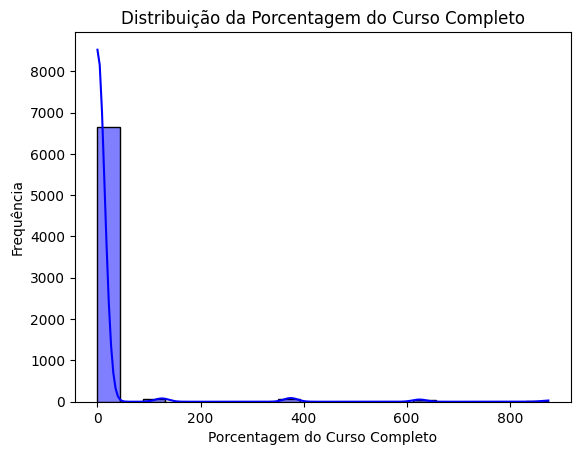

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=cienca_computacao_df, x='PORCENTAGE.CURSO.COMPLETO', kde=True, bins=20, color='blue')
plt.title("Distribuição da Porcentagem do Curso Completo")
plt.xlabel("Porcentagem do Curso Completo")
plt.ylabel("Frequência")
plt.show()


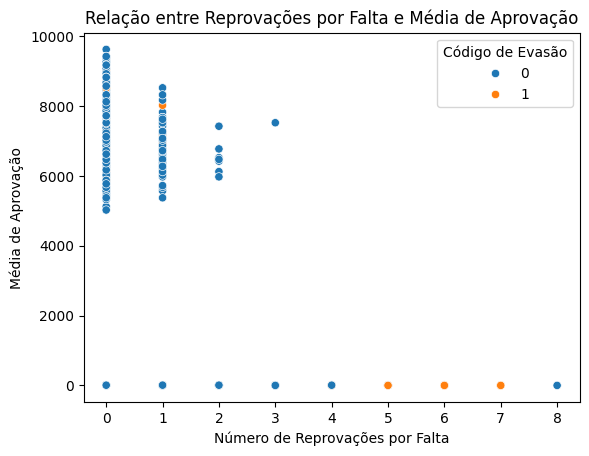

In [13]:
sns.scatterplot(data=cienca_computacao_df, x='N.RPF', y='MEDIA.APROV', hue='COD_EVASAO')
plt.title("Relação entre Reprovações por Falta e Média de Aprovação")
plt.xlabel("Número de Reprovações por Falta")
plt.ylabel("Média de Aprovação")
plt.legend(title="Código de Evasão")
plt.show()


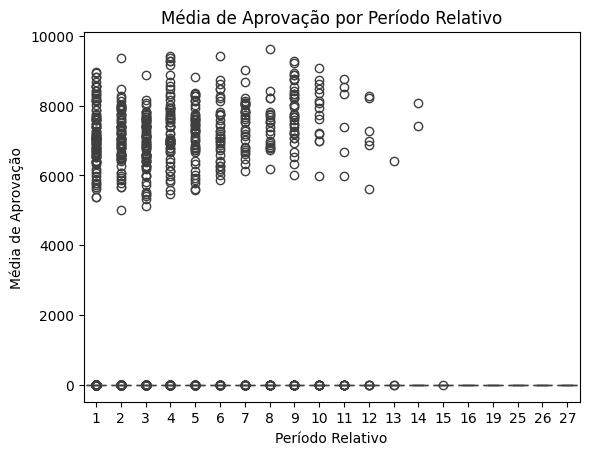

In [14]:
sns.boxplot(data=cienca_computacao_df, x='PERIODO_RELATIVO', y='MEDIA.APROV')
plt.title("Média de Aprovação por Período Relativo")
plt.xlabel("Período Relativo")
plt.ylabel("Média de Aprovação")
plt.show()


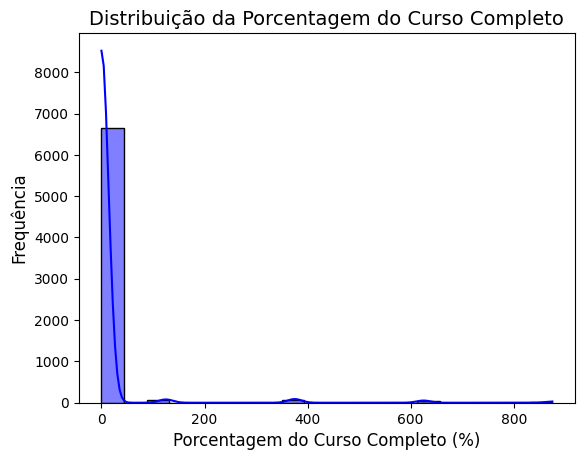

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=cienca_computacao_df, x='PORCENTAGE.CURSO.COMPLETO', kde=True, bins=20, color='blue')
plt.title("Distribuição da Porcentagem do Curso Completo", fontsize=14)
plt.xlabel("Porcentagem do Curso Completo (%)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()


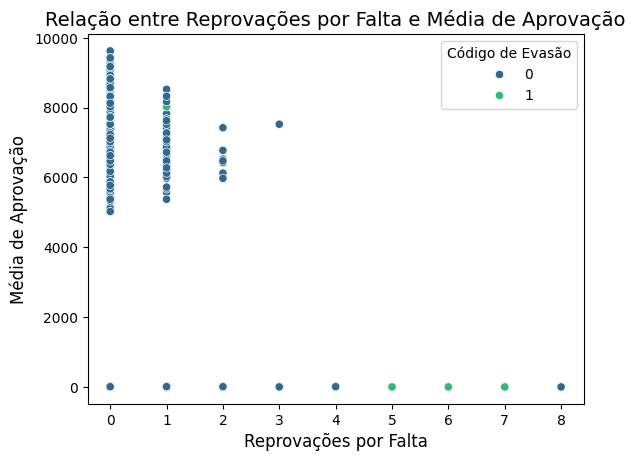

In [16]:
sns.scatterplot(data=cienca_computacao_df, x='N.RPF', y='MEDIA.APROV', hue='COD_EVASAO', palette='viridis')
plt.title("Relação entre Reprovações por Falta e Média de Aprovação", fontsize=14)
plt.xlabel("Reprovações por Falta", fontsize=12)
plt.ylabel("Média de Aprovação", fontsize=12)
plt.legend(title="Código de Evasão")
plt.show()


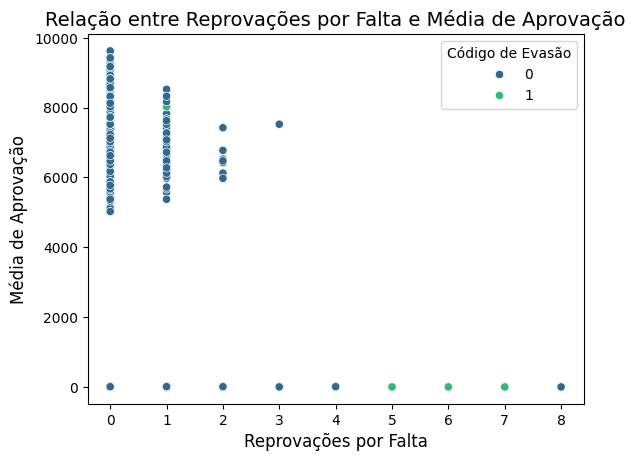

In [17]:
sns.scatterplot(data=cienca_computacao_df, x='N.RPF', y='MEDIA.APROV', hue='COD_EVASAO', palette='viridis')
plt.title("Relação entre Reprovações por Falta e Média de Aprovação", fontsize=14)
plt.xlabel("Reprovações por Falta", fontsize=12)
plt.ylabel("Média de Aprovação", fontsize=12)
plt.legend(title="Código de Evasão")
plt.show()


/tmp/ipykernel_1263102/3300583386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cienca_computacao_df, x='PERIODO', y='TOTAL_REPROVACOES', palette='coolwarm')


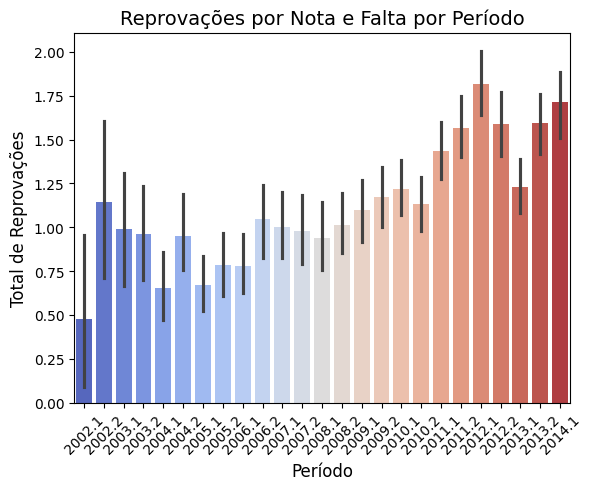

In [18]:
cienca_computacao_df['TOTAL_REPROVACOES'] = cienca_computacao_df['N.RPN'] + cienca_computacao_df['N.RPF']
sns.barplot(data=cienca_computacao_df, x='PERIODO', y='TOTAL_REPROVACOES', palette='coolwarm')
plt.title("Reprovações por Nota e Falta por Período", fontsize=14)
plt.xlabel("Período", fontsize=12)
plt.ylabel("Total de Reprovações", fontsize=12)
plt.xticks(rotation=45)
plt.show()


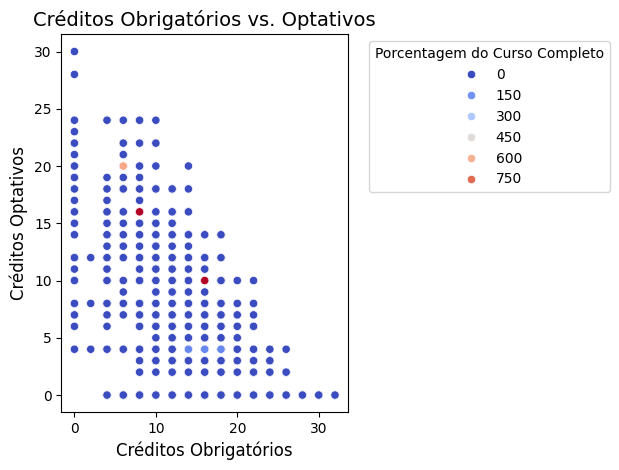

In [23]:
sns.scatterplot(
    data=cienca_computacao_df, 
    x='N.CREDITOS.OBRIGATORIA', 
    y='N.CREDITOS.OPTATIVA', 
    hue='PORCENTAGE.CURSO.COMPLETO', 
    palette='coolwarm'
)
plt.title("Créditos Obrigatórios vs. Optativos", fontsize=14)
plt.xlabel("Créditos Obrigatórios", fontsize=12)
plt.ylabel("Créditos Optativos", fontsize=12)
plt.legend(title="Porcentagem do Curso Completo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


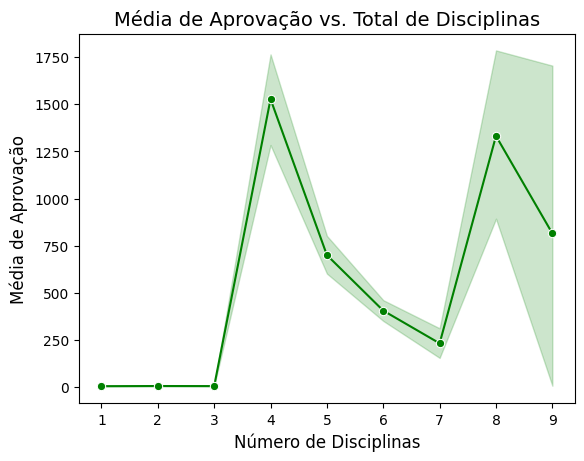

In [20]:
sns.lineplot(data=cienca_computacao_df, x='N.DISC', y='MEDIA.APROV', marker='o', color='green')
plt.title("Média de Aprovação vs. Total de Disciplinas", fontsize=14)
plt.xlabel("Número de Disciplinas", fontsize=12)
plt.ylabel("Média de Aprovação", fontsize=12)
plt.show()


/tmp/ipykernel_1263102/304734699.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cienca_computacao_df, x='STATUS.SEM', palette='pastel')


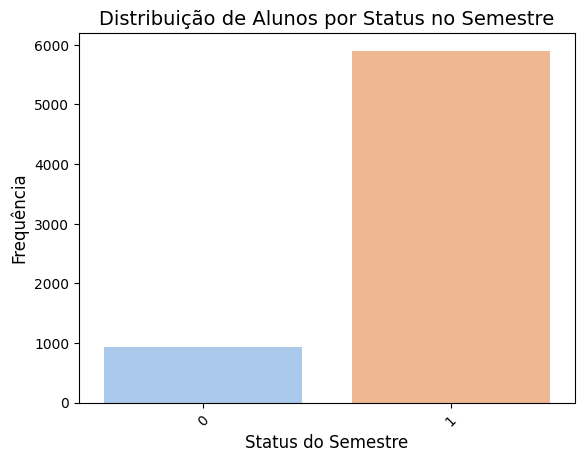

In [21]:
sns.countplot(data=cienca_computacao_df, x='STATUS.SEM', palette='pastel')
plt.title("Distribuição de Alunos por Status no Semestre", fontsize=14)
plt.xlabel("Status do Semestre", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.xticks(rotation=45)
plt.show()


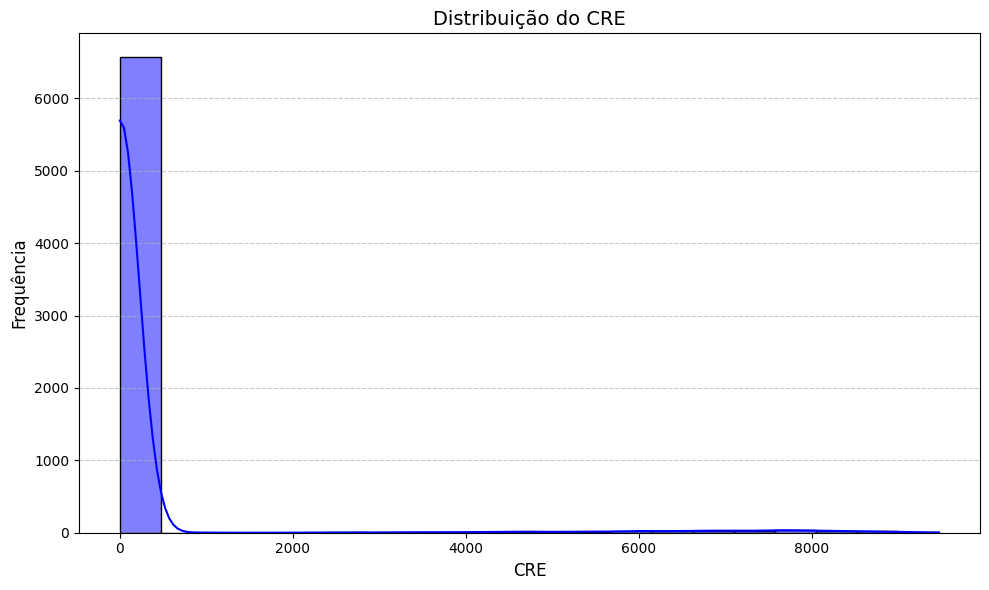

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cienca_computacao_df, x='CRE', kde=True, bins=20, color='blue')
plt.title("Distribuição do CRE", fontsize=14)
plt.xlabel("CRE", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


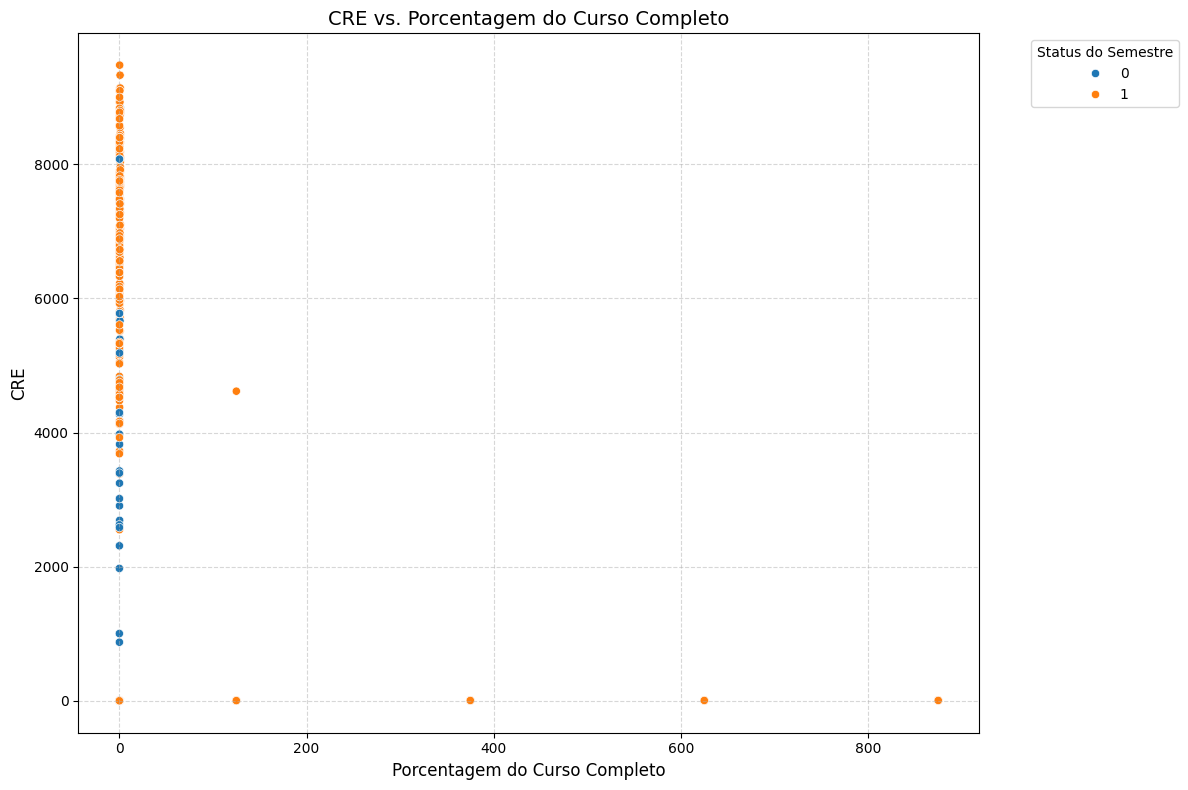

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cienca_computacao_df,
    x='PORCENTAGE.CURSO.COMPLETO',
    y='CRE',
    hue='STATUS.SEM',  # Coluna que pode representar o status do semestre
    palette='tab10'
)
plt.title("CRE vs. Porcentagem do Curso Completo", fontsize=14)
plt.xlabel("Porcentagem do Curso Completo", fontsize=12)
plt.ylabel("CRE", fontsize=12)
plt.legend(title="Status do Semestre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


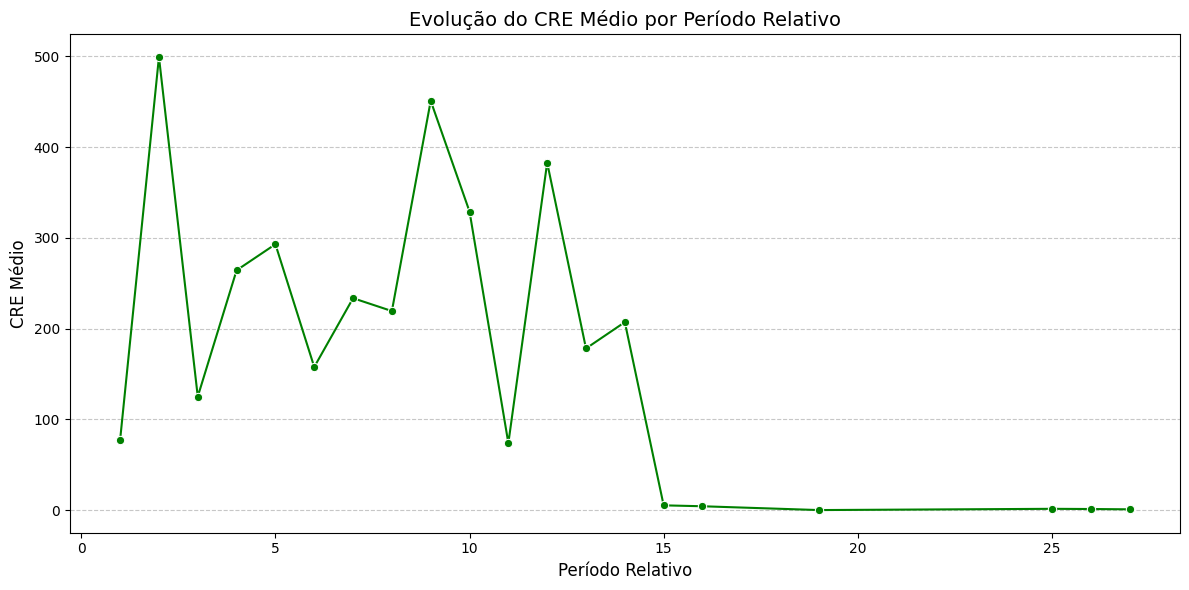

In [26]:
cre_por_semestre = cienca_computacao_df.groupby('PERIODO_RELATIVO')['CRE'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cre_por_semestre, x='PERIODO_RELATIVO', y='CRE', marker='o', color='green')
plt.title("Evolução do CRE Médio por Período Relativo", fontsize=14)
plt.xlabel("Período Relativo", fontsize=12)
plt.ylabel("CRE Médio", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
